In [1]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
env=gym.make('CartPole-v0')
obs=env.reset()
obs

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


array([-0.03498204,  0.0493593 , -0.02351852,  0.01932415])

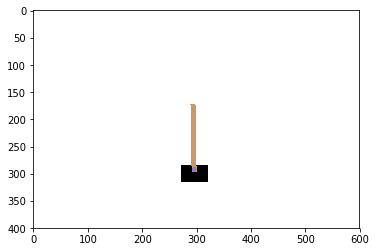

In [3]:
'''%matplotlib inline
plt.imshow(env.render(mode="rgb_array"))
plt.show()
env.close()
'''

# Policy Gradients

# Q-Value

In [3]:
import numpy as np
nan=np.nan
transition_probabilities = np.array([
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # in s0, if action a0 then proba 0.7 to state s0 and 0.3 to state s1, etc.
        [[0.0, 1.0, 0.0], [nan,nan,nan], [0.0, 0.0, 1.0]],
        [[nan,nan,nan], [0.8, 0.1, 0.1], [nan,nan,nan]],
    ])

rewards = np.array([
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ])

possible_actions = [[0, 1, 2], [0, 2], [1]]


In [21]:
Q=np.full((3,3),-np.inf)
for state,actions in enumerate(possible_actions):
    Q[state,actions]=0.0

learning_rate=0.01
discount_rate=0.95
n_iterations=1000

for iteration in range(n_iterations+1):
    Q_prev=Q.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q[s,a]=np.sum(transition_probabilities[s,a,s_next]*
                          (rewards[s,a,s_next]+discount_rate*np.max(Q_prev[s_next]))
                         for s_next in range(3))
    if iteration %100==0:
        print(Q,'\n')

[[  7.   0.   0.]
 [  0. -inf -50.]
 [-inf  32. -inf]] 

[[21.88710061 20.79213811 16.85544644]
 [ 1.10867978        -inf  1.1676708 ]
 [       -inf 53.86134555        -inf]] 

[[21.89917812 20.80421562 16.86752395]
 [ 1.12075729        -inf  1.1797483 ]
 [       -inf 53.87342305        -inf]] 

[[21.89924963 20.80428712 16.86759546]
 [ 1.1208288         -inf  1.17981981]
 [       -inf 53.87349456        -inf]] 

[[21.89925005 20.80428755 16.86759588]
 [ 1.12082922        -inf  1.17982023]
 [       -inf 53.87349498        -inf]] 

[[21.89925005 20.80428755 16.86759588]
 [ 1.12082922        -inf  1.17982024]
 [       -inf 53.87349498        -inf]] 

[[21.89925005 20.80428755 16.86759588]
 [ 1.12082922        -inf  1.17982024]
 [       -inf 53.87349498        -inf]] 

[[21.89925005 20.80428755 16.86759588]
 [ 1.12082922        -inf  1.17982024]
 [       -inf 53.87349498        -inf]] 

[[21.89925005 20.80428755 16.86759588]
 [ 1.12082922        -inf  1.17982024]
 [       -inf 53.87349498

# Q-Learning

In [11]:
import numpy as np

discount_rate=0.95
learning_rate=0.1
learning_rate_decay=1e-6
n_iterations=5000

Q=np.full((3,3),-np.inf)
for state,actions in enumerate(possible_actions):
    Q[state,actions]=0.0

s=0

for iteration in range(n_iterations+1):
    a=np.random.choice(possible_actions[s])
    s_next=np.random.choice(range(3),p=transition_probabilities[s,a])
    learning_rate=learning_rate/(1+iteration*learning_rate_decay)
    Q[s,a]=(1-learning_rate)*Q[s,a]+learning_rate*(rewards[s,a,s_next]+discount_rate*np.max(Q[s_next]))
    s=s_next
    
    if iteration %1000==0:
        print(Q,'\n')

[[  1.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]] 

[[23.95224821 25.06446187 22.87387251]
 [ 2.41784968        -inf  0.52625429]
 [       -inf 55.76234379        -inf]] 

[[22.97539056 22.61065119 17.43514626]
 [ 3.66420779        -inf  3.95053287]
 [       -inf 58.09456344        -inf]] 

[[23.64306968 22.65724256 18.70349411]
 [ 3.75620381        -inf  4.00561128]
 [       -inf 55.9608726         -inf]] 

[[23.77017801 22.64657893 18.70598609]
 [ 3.75740623        -inf  3.97788796]
 [       -inf 56.06844924        -inf]] 

[[23.7696086  22.64649662 18.70317721]
 [ 3.75743133        -inf  3.97706121]
 [       -inf 56.0647402         -inf]] 

